In [18]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras import layers

In [19]:
class_num = 15
RANDOM_SEED = 3
data_path = 'C:/Users/Diego Carasa/Desktop/TRABAJO IA/dataset/datos.csv'
model_path = 'C:/Users/Diego Carasa/Desktop/TRABAJO IA/dataset/domino_classifier.hdf5'
tflite_save_path = 'C:/Users/Diego Carasa/Desktop/TRABAJO IA/dataset/domino_classifier.tflite'

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
input_data = np.loadtxt(data_path, delimiter=',', dtype='float32', usecols=list(range(1, (16) + 1)))
class_id = np.loadtxt(data_path, delimiter=',', dtype='int32', usecols=(0))

x_train, x_test, y_train, y_test = train_test_split(
    input_data, class_id, test_size=0.2, random_state=RANDOM_SEED)


In [22]:
import numpy as np

# Función para normalizar los datos, diferenciando 0 de -1
def normalize_data(data):
    normalized_data = np.where(
        data == -1,      # Si el valor es -1 (sin ficha)
        0,               # Mapearlo a 0
        (data + 1) / 7   # Escalar los valores [0, 6] a [0.1, 1]
    )
    return normalized_data

# Normalización de los datos de entrenamiento y prueba
x_train_normalized = normalize_data(x_train)
x_test_normalized = normalize_data(x_test)


In [23]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((16, )),
    tf.keras.layers.Dense(256, activation='gelu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(230, activation='gelu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(70, activation='gelu'),

   #256,230,70 Y 0.5
    tf.keras.layers.Dense(class_num, activation='softmax')
])

In [24]:
 model.compile(
        optimizer=tf.keras.optimizers.Adam(0.001),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        metrics=['accuracy']
    )

In [25]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=150)

In [26]:
history=model.fit(
    x_train_normalized,
    y_train,
    epochs=3000,
    batch_size=64,
    validation_data=(x_test_normalized, y_test),
    #callbacks=[stop_early]
)
val_loss, val_acc = model.evaluate(x_test_normalized, y_test, batch_size=64)

Epoch 1/3000
87/87 [==============================] - 2s 6ms/step - loss: 2.4602 - accuracy: 0.1592 - val_loss: 2.3064 - val_accuracy: 0.1763
Epoch 2/3000
87/87 [==============================] - 0s 4ms/step - loss: 2.2806 - accuracy: 0.1786 - val_loss: 2.2232 - val_accuracy: 0.1935
Epoch 3/3000
87/87 [==============================] - 0s 4ms/step - loss: 2.2218 - accuracy: 0.1980 - val_loss: 2.1915 - val_accuracy: 0.1978
Epoch 4/3000
87/87 [==============================] - 0s 4ms/step - loss: 2.1772 - accuracy: 0.2232 - val_loss: 2.1478 - val_accuracy: 0.2237
Epoch 5/3000
87/87 [==============================] - 0s 4ms/step - loss: 2.1411 - accuracy: 0.2333 - val_loss: 2.0972 - val_accuracy: 0.2317
Epoch 6/3000
87/87 [==============================] - 0s 4ms/step - loss: 2.0936 - accuracy: 0.2405 - val_loss: 2.0576 - val_accuracy: 0.2489
Epoch 7/3000
87/87 [==============================] - 0s 4ms/step - loss: 2.0689 - accuracy: 0.2433 - val_loss: 2.0471 - val_accuracy: 0.2453
Epoch 

In [59]:
model.save(model_path)

C:\anaconda\envs\tensorflow\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [60]:

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\DIEGOC~1\AppData\Local\Temp\tmp5bf645dw\assets


INFO:tensorflow:Assets written to: C:\Users\DIEGOC~1\AppData\Local\Temp\tmp5bf645dw\assets


112408

44/44 [==============================] - 0s 2ms/step


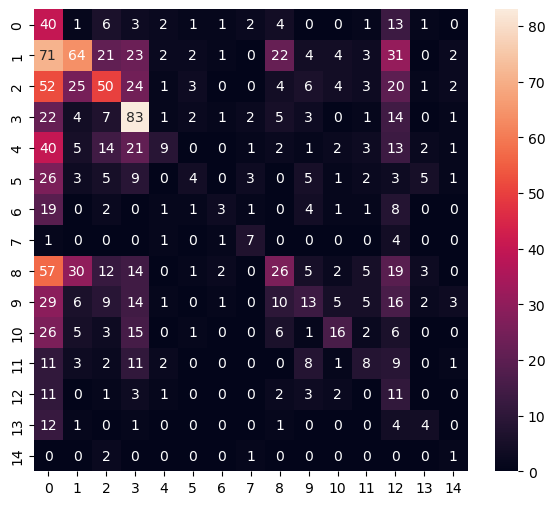

Classification Report
              precision    recall  f1-score   support

           0       0.10      0.53      0.16        75
           1       0.44      0.26      0.32       250
           2       0.37      0.26      0.30       195
           3       0.38      0.57      0.45       146
           4       0.43      0.08      0.13       114
           5       0.27      0.06      0.10        67
           6       0.30      0.07      0.12        41
           7       0.41      0.50      0.45        14
           8       0.32      0.15      0.20       176
           9       0.25      0.11      0.16       114
          10       0.42      0.20      0.27        81
          11       0.24      0.14      0.18        56
          12       0.06      0.32      0.11        34
          13       0.22      0.17      0.20        23
          14       0.08      0.25      0.12         4

    accuracy                           0.24      1390
   macro avg       0.29      0.25      0.22      1390
weig

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(x_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

In [28]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Graficar la pérdida (loss)
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Pérdida Entrenamiento', color='blue')
    plt.plot(history.history['val_loss'], label='Pérdida Validación', color='orange')
    plt.title('Pérdida Durante el Entrenamiento')
    plt.xlabel('Época')
    plt.ylabel('Pérdida')
    plt.legend()
    plt.grid(True)

    # Graficar la precisión (accuracy)
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Precisión Entrenamiento', color='green')
    plt.plot(history.history['val_accuracy'], label='Precisión Validación', color='red')
    plt.title('Precisión Durante el Entrenamiento')
    plt.xlabel('Época')
    plt.ylabel('Precisión')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()


In [62]:
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(NUM_GESTURES), yticklabels=range(NUM_GESTURES))
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.show()

44/44 [==============================] - 0s 1ms/step


NameError: name 'NUM_GESTURES' is not defined

<Figure size 1000x700 with 0 Axes>

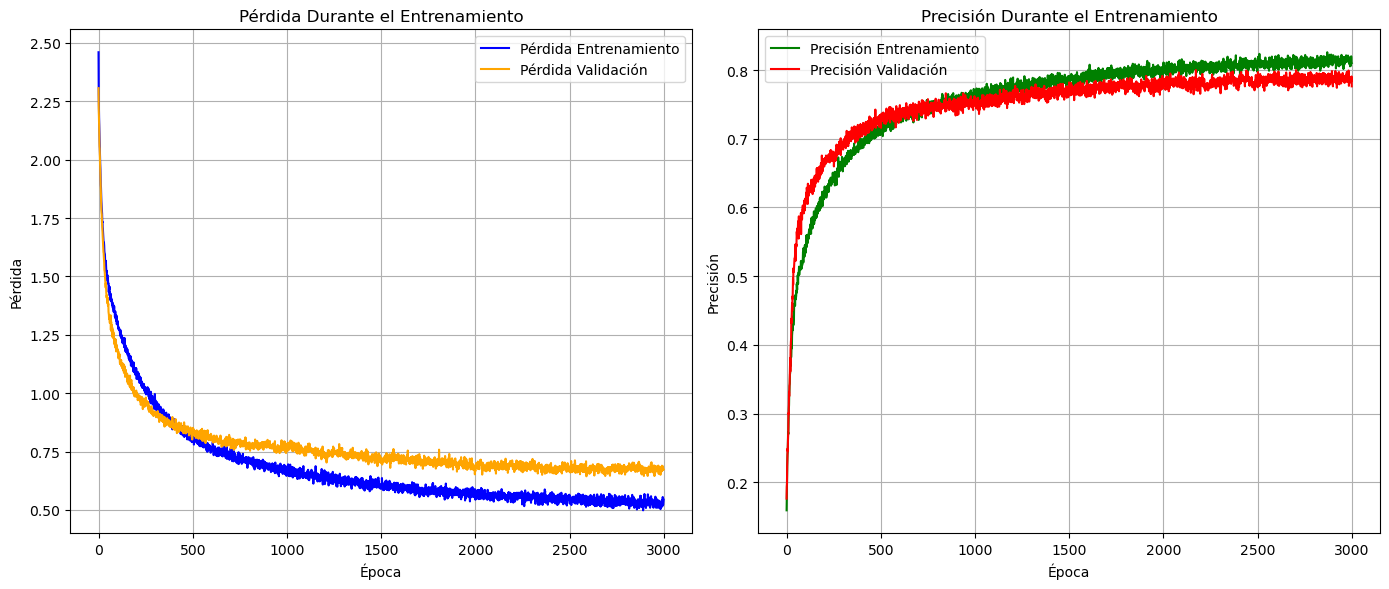

In [29]:
# Dibujar las gráficas de pérdida y precisión
plot_training_history(history)
